# W203 Lab 3: A Regression Study of COVID-19- Stage 1 Draft

## Team- Rashmi Singh, Christina Chen, Tian Zhu, Sarah Yifei Wang

## Section 3 Tuesday 6:30 PM PT


## Chapter 1. Introduction

During the time of COVID-19, many studies have been conducted to assess the widespread use of face masks in reducing the spread of the disease. This is particularly true for when masks are used universally within communities with denser populations. The CDC has advocated for masks, or any cloth face coverings for that matter, as a barrier to prevent respiratory droplets from traveling into the air when a person coughs, sneezes, talks, or raises their voice. CNN reports that if 95% of Americans wore face masks in public, it could prevent more than 450,000 deaths by November 1, 2020. Despite the effectiveness of preventing the spread of COVID-19 when wearing a mask, many have not followed suit in accordance with CDC guidelines. As states enter different phases of reopening, many have executed mandatory face mask use policy for employees in public-facing businesses. The concept that this specific study will measure is:

#### The effects of the policy of mandating face masks in public facing businesses on the total number of COVID cases recorded for each state.

We assume the dates of which the mandate was placed is critical to our study for measuring how the timeliness of the mandate date ultimately saves thousands of lives. We also want to understand how other factors such as the population at risk of serious illness, stay at home duration, business closed duration, have played a role in the total number of cases and how they interact with the face mask mandate policy.

We will operationalize the variable “mandate face mask use by employees in public-facing business”. Since we are given the date for face mask mandate and not the date of the first COVID case, we will have to calculate the days since “state of emergency” per state to be able to measure the effect of face mask mandate and covid cases. Those states that did not participate in face mask mandate have a 0 in our dataset, which we will replace with NaN as it will affect our models. 

In our study, we conducted various tasks prior to our linear regression models:
1. First, we studied the data and tried to understand the distribution of the total number of cases by each state, which we used as the dependent variable for our study. Our aim in understanding the distribution is to identify outliers as well as get a general idea about the dependent variable spread.
2. We cleaned our data and identified issues such as duplicates or missing value that can affect our study.
3. We performed exploratory data analysis (EDA) in order to form our base model and identified key variables to be used for our linear regression models.
4. We identified required data transformation for effective study and required key variables created from 'delay in face mask mandate' date
5. We took into consideration the number variables for EDA and assessed their suitablity for our model improvement.
6. We studied the correlation between the independent variables with the dependent variable to assess our assumption.
7. We created a base model and conducted 2 improvements on it. We checked the quality of the model along with a multicollinearity check.
8. Lastly, we assessed CLM assumptions and verified if any violations exist. We also summarized the statistical and practical significance of our study.
9. We did a study on omitted variables before concluding the study.

######  Installing required packages for the study

In [3]:
suppressMessages(install.packages("DataExplorer"))
suppressMessages(install.packages("lmtest"))
suppressMessages(install.packages("ggpubr"))
install.packages("sandwich")
suppressMessages(install.packages("stargazer"))
suppressMessages(install.packages("tidyselect"))
suppressMessages(install.packages("tidyverse"))
suppressMessages(install.packages("janitor"))
suppressMessages(install.packages("GGally"))
suppressMessages(install.packages("corrr"))


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
suppressMessages(install.packages("ggcorrplot"))
library(ggcorrplot, quietly = T)

In [5]:
library(plyr, quietly = T)
library(dplyr, quietly = T)
library(ggplot2, quietly = T)
library(data.table, quietly = T)
library(DataExplorer, quietly = T)
library(lubridate, quietly = T)
library(gridExtra, quietly = T)
library(readxl, quietly = T)
library(tidyverse, quietly = T)
library(readxl, quietly = T)
library(lmtest, quietly = T)
library(car, quietly = T)
library(sandwich, quietly = T)
library(stargazer, quietly = T)
library(janitor, quietly = T)
library(ggpubr, quietly = T)
library(GGally, quietly = T)
library(corrr, quietly = T)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ tibble  3.0.3     ✔ purrr   0.3.4
✔ tidyr   1.1.0     ✔ strin

Feedback from peer review--Suppressing warning- reasoning???

In [6]:
#loading the data
suppressWarnings(suppressMessages(df_raw<- read_excel("covid-19_dist0720 .xlsx", sheet = "Covid-19")))



## Chapter 2. Model Building Process

### 2.1 Data Cleaning

Our team evaluated the integrity of data by checking if there are any duplicate values, improper data & data types and missing values.
In summary:
1. Identified two rows for Arizona state
2. Formatted date type fields to correct format

###### A. Remove duplicates

Scanning through the data, it looks like there are two records for Arizona. It might be additional number for Total cases and Total deaths as all other field values are exact duplicate. Hence we will add the Total cases and Total Death numbers from both rows and remove the duplicate row.

##### B. Data Formatting

Certain date columns are not in date format, hence we need to convert them into date type in order to use them for study. 

The resulting data is stored as"df". The R code shows the steps that were taken:

#### 2.1.1 Code

In [7]:
# Resolve for duplicate row for Arizona
df_raw[df_raw$State=="Arizona",2]<-df_raw[df_raw$State=="Arizona",2]+df_raw[df_raw$State=="arizona",2] #Adding the total cases for Arizona from both rows
df_raw[df_raw$State=="Arizona",3]<-df_raw[df_raw$State=="Arizona",3]+df_raw[df_raw$State=="arizona",3] #Adding the total deaths for Arizona from both rows
df_cleaned<-df_raw[!(df_raw$State=="arizona"),]# removing the duplicate row for Arizona


#Converting date columns to date
df_cleaned$`Stay at home/ shelter in place` <- excel_numeric_to_date(df_cleaned$`Stay at home/ shelter in place`) 
df_cleaned$`End/relax stay at home/shelter in place` <- excel_numeric_to_date(df_cleaned$`End/relax stay at home/shelter in place`)
df_cleaned$`Closed non-essential businesses` <- excel_numeric_to_date(df_cleaned$`Closed non-essential businesses`)
df_cleaned$`Began to reopen businesses statewide` <- excel_numeric_to_date(df_cleaned$`Began to reopen businesses statewide`)
df_cleaned$`Mandate face mask use by employees in public-facing businesses` <- excel_numeric_to_date(df_cleaned$`Mandate face mask use by employees in public-facing businesses`)

# saving the cleaned dataset as df
df<-df_cleaned


### 2.2 EDA and Data transformation



Since we know that to do the EDA, we may also have to do transformation along the way, hence we are doing simultaneouly in this section. There will be summary provided of all the transformations.

#### 2.2.1 Dependent variable

Our main variable for the study as dependent variable is Total cases. We started by looking at summary. The range of the total cases is very wide with minimum of 939 and maximum close to 400,000. 


In [8]:
summary(df$`Total Cases`)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    939   11415   31353   56416   68003  398828 

Next, we need to see distribution of total number of cases with other variables that may drive it. Population looks reasonable to have a look at. Hence we look at the scatterplot of total number of cases with population to examine the the distribution.



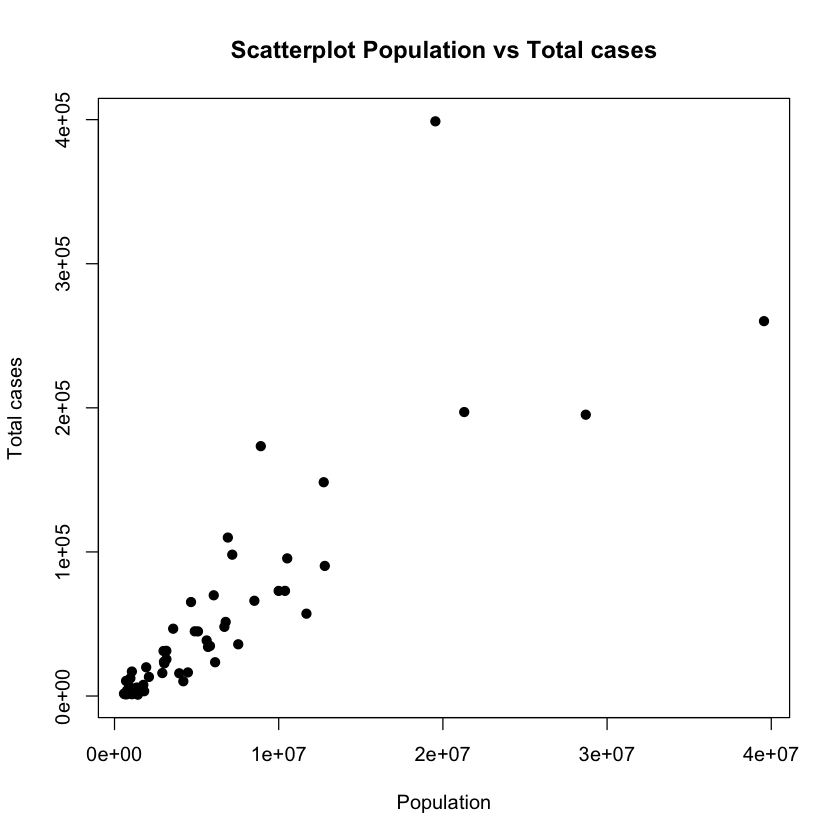

In [9]:
plot(df$`Population 2018`, df$`Total Cases`, main="Scatterplot Population vs Total cases", xlab="Population", ylab="Total cases", pch=19)         

We can see from "Population vs Total Cases' scatterplot that population is almost lineraly correlated to total number of case. This makes sense since larger population may tend of have more number of case. Hence we feel there is a need to normalize total cases.For this, we divide total cases by population density as higher density areas tend to have lower levels of “natural social distance” compared to lower density areas and hence observe higher number of cases. By doing this transformation, we will be able to truly able to study impact of face mask mandate policy.

Also, our dependent variable will benefit from a log-transform as it allows the impact of the independent variables to be understood as a percent change in cases per unit population.

In below code, we have calculated "case_norm" as our dependent variable after applying above transformation.

In [10]:
#Calculate the transformed dependent variable
df$case_norm <- log(df$`Total Cases`/df$'Population density per square miles')


#### 2.2.2 Independent variables

As we want to measure the effect of the policy, it is reasonable to look how long a mandate has been applied. Our assumption is longer the mandate has been applied, greater effect on the number of cases.For this we will need the date when first Covid case appeared for each state. Since this information is not available and is difficult to obtain, we will use 'State of emergency' date as our benchmark.

Hence key-variable in scope:Delay in applying the face mask mandate.


There could also be other explanatory variables that can explain the number of cases like below. We will perform EDA on these variables in coming section.


1. Number of days business were closed- We can assume that longer the business were close, the better effect it has on the total number of cases. 
2. Population at risk- This population has higher risk of getting infected and spread the infection.
3. NYC - We can see that while most states have high cases have high population, NewYork state in particular has significantly high number of cases because of high cases in NYC alone. The city was the epicenter of the COVID cases as this is a global city with large number of people coming in from different parts of the world and the spread may have started there much earlier before emergency was applied(debate is still going on!). Since New York has characteristics of the lifestyle and COVID situation very different from other states, it is a good reason to use New York state as an indicator variable.
4. Number of days since mandate been applied  - This is also an important factor to look at. Our assumption is longer the policy has been in place, higher the effect the policy had on the total number of cases. However, there is a caveat of real effect of the policy may take a long time to be able to observe as COVID symptoms take about 1-2 weeks and the infection may have spread already despite the mask policy been applied.

In [11]:
#Calculating key variables
#encoding Manadate face mask date column to factor 1 and 0. 1 means yes, 0 means No
df$`MandateFaceMask_fac` <- ifelse(as.character(df$`Mandate face mask use by employees in public-facing businesses`)=="1899-12-30", 0, 1)
df$delay_facemask_mandate<- ifelse(df$MandateFaceMask_fac==1,as_datetime(df$`Mandate face mask use by employees in public-facing businesses`) -  as_datetime(df$`State of emergency`),NA)
#Calculating other covariates
# Calculating duration variables

df$DaysSince_Facemask_mandate <- as.numeric(as_datetime("2020-07-06")- as_datetime(df$`Mandate face mask use by employees in public-facing businesses`))
df$BusinessClosed_duration <- as.numeric(df$`Began to reopen businesses statewide` -  df$`Closed non-essential businesses`)
df$NYC<-ifelse(df$State=="New York",1,0)

###### 2.2.3 Fixing Missing data

We see that some of dates are missing, for examples, few states have Business reopen date but not business closing date.We don’t know if those values are left blank because that event has not yet happened or due to error. But it is best to make them "NA" for this study



In [12]:
#encoding date columns to factor 1 and 0. 1 means yes, 0 means No to be used in median calculations.
df$`StayAtHome_fac` <- ifelse(as.character(df$`Stay at home/ shelter in place`)=="1899-12-30", 0,1)
df$`EndStayAtHome_fac` <- ifelse(as.character(df$`End/relax stay at home/shelter in place`)=="1899-12-30",0,1)
df$`ClosedNonEssBusiness_fac` <- ifelse(as.character(df$`Closed non-essential businesses`)=="1899-12-30",0,1)
df$`ReopenBusiness_fac` <- ifelse(as.character(df$`Began to reopen businesses statewide`) == "1899-12-30", 0, 1)
df$`MandateFaceMask_fac` <- ifelse(as.character(df$`Mandate face mask use by employees in public-facing businesses`)=="1899-12-30", 0, 1)


#imputing NA for missing data

df$delay_facemask_mandate[df$MandateFaceMask_fac==0] <- NA
df$Stay_at_Home_duration[df$EndStayAtHome_fac==0 | df$StayAtHome_fac==0] <- NA
df$BusinessClosed_duration[df$ClosedNonEssBusiness_fac==0 | df$ReopenBusiness_fac==0] <- NA
df$DaysSince_Facemask_mandate[df$MandateFaceMask_fac==0] <- NA


Warning message:
“Unknown or uninitialised column: `Stay_at_Home_duration`.”

##### 2.2.4 EDA of key variables

In this section, we perform correlation analysis of key variables with our dependent variables to assess their suitablity.
Also we check the correlation between the variables to assess multicollinearity.
Based on the EDA, we will proceed with the variables to choose for the regression study.


###### 2.2.4.a Correlation between Delay in applying the face mask mandate and total cases normalized

`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 10 rows containing non-finite values (stat_cor).”Warning message:
“Removed 10 rows containing missing values (geom_point).”

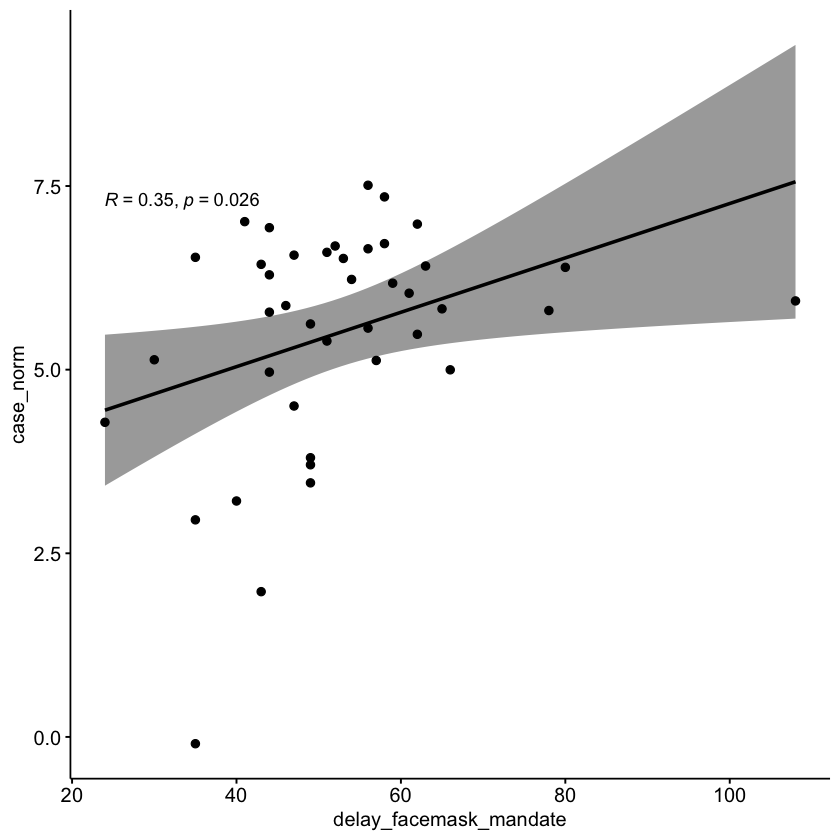

In [13]:

#Correlation between Delay in applying the face mask mandate and total cases normalized
suppressWarnings(ggscatter(df,x ="delay_facemask_mandate",y="case_norm", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.method =  "pearson"))

From the plot and correlation value as 0.35, we can infer that increase in the delay has a positive impact on percentage increase of cases per unit poplation per square mile. This supports our assumption. Hence we can include this variables for our regression analysis.

###### 2.2.4.b Correlation between  Business closed duration and total cases normalized

`geom_smooth()` using formula 'y ~ x'


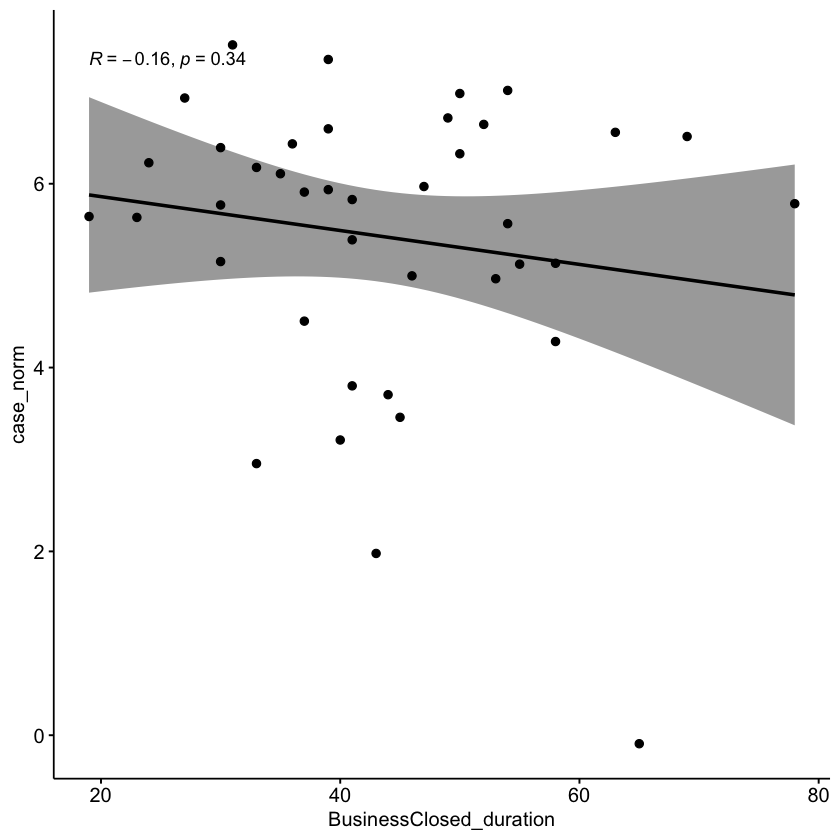

In [14]:


#Correlation between  Business closed duration and total cases normalized

suppressWarnings(ggscatter(df[!is.na(df$BusinessClosed_duration),],x ="BusinessClosed_duration",y="case_norm", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.method =  "pearson"))

From the plot and correlation value as -0.16, we can infer that increase in the business closed duration has a negative impact on percentage increase of cases per unit poplation per square mile. This supports our assumption that longer duration of business closed will decrese COVID cases. 

###### 2.2.4.c Correlation between  Number of Days Face mask mandate has been applied and total cases normalized

`geom_smooth()` using formula 'y ~ x'


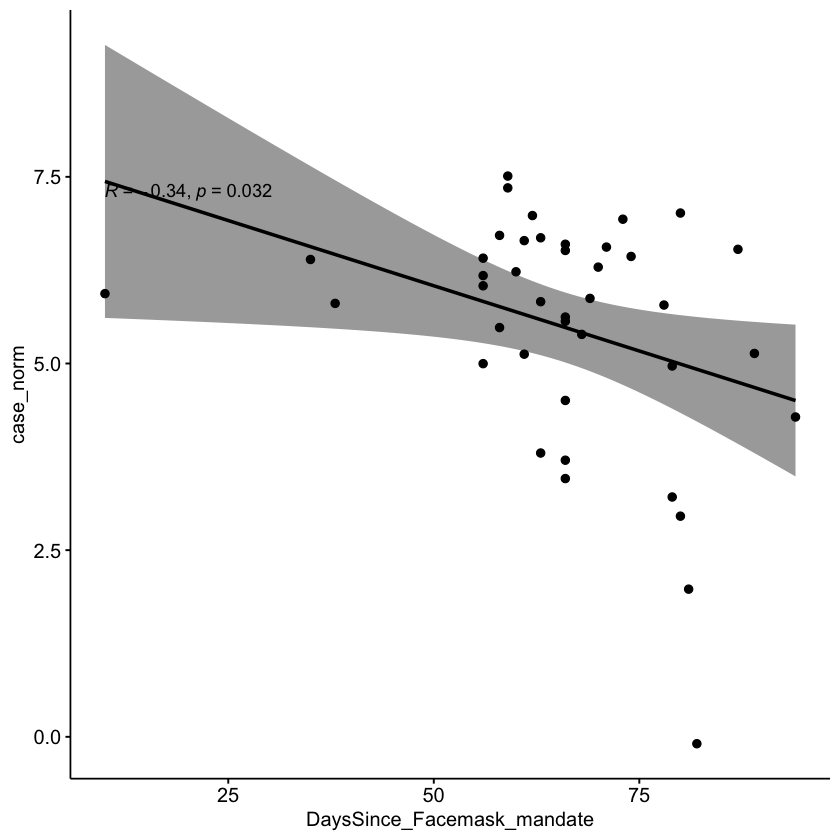

In [15]:

#Correlation between  Number of Days Face mask mandate has been applied and total cases normalized

suppressWarnings(ggscatter(df[!is.na(df$DaysSince_Facemask_mandate),],x ="DaysSince_Facemask_mandate",y="case_norm", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.method =  "pearson"))

From the plot and correlation value as -0.18, we can infer that more duration of the policy has a negative impact on percentage increase of cases per unit poplation per square mile. However the policy may have minimal to no effect, as business itself were closed if there is overlap. We may be interested in the effect of interaction between busines closed days and number of days the policy has been in effect.

###### 2.2.4.d Correlation between  Population at risk and total cases normalized

`geom_smooth()` using formula 'y ~ x'


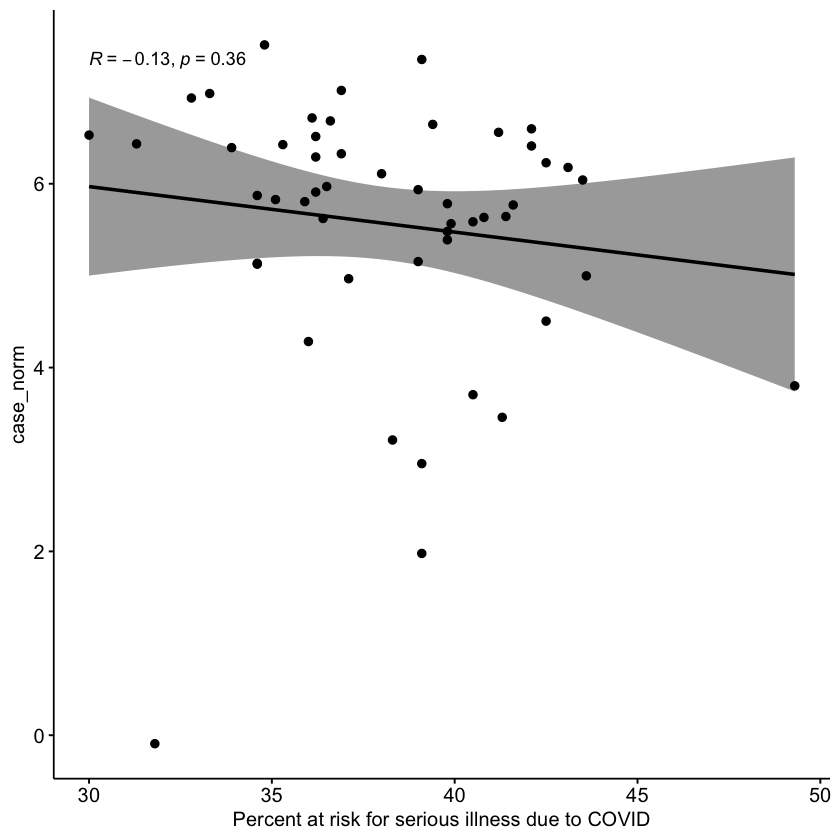

In [16]:
# correlation between Population at risk and Total number of cases


suppressWarnings(ggscatter(df,x="Percent at risk for serious illness due to COVID",y ="case_norm",, add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.method =  "pearson"))

This plot is going against our assumption. We expect percentage increase in covid cases per unit population density as population at risk percent increases. It could be explained as people with serious illness are taking 'extra' caution to stay safe. It would be interesting to reasearch on this in another study, but we can still include this in our regression study.

###### 2.2.4.e Correlation between  NY state and total cases normalized

`geom_smooth()` using formula 'y ~ x'


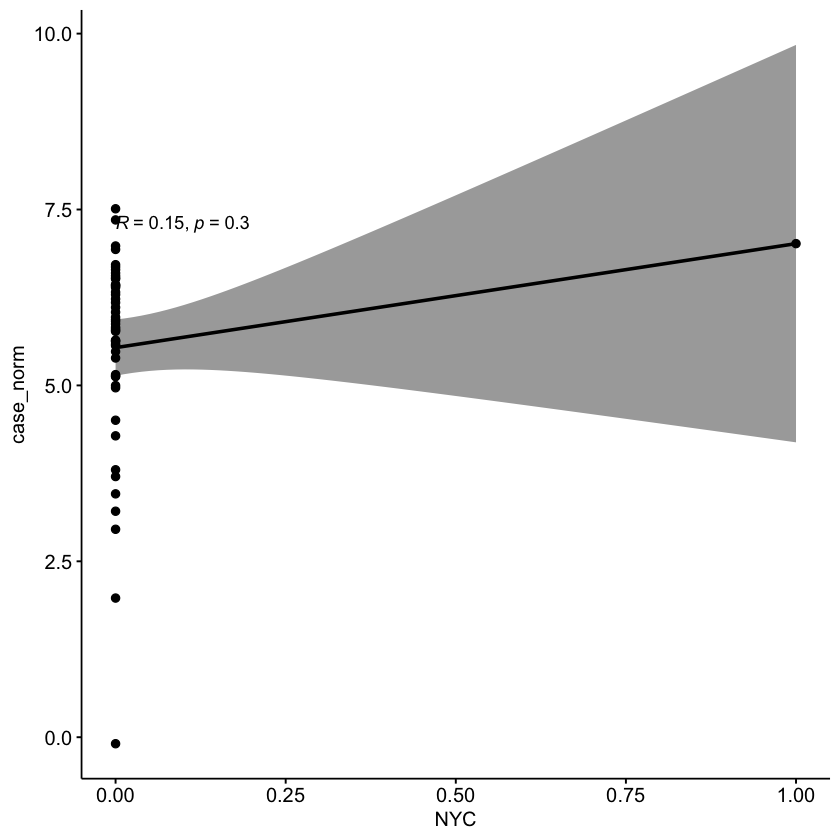

In [17]:
# correlation between Population at risk and Total number of cases


suppressWarnings(ggscatter(df,x="NYC",y ="case_norm",, add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.method =  "pearson"))

###### 2.2.4.d Correlation between the variables

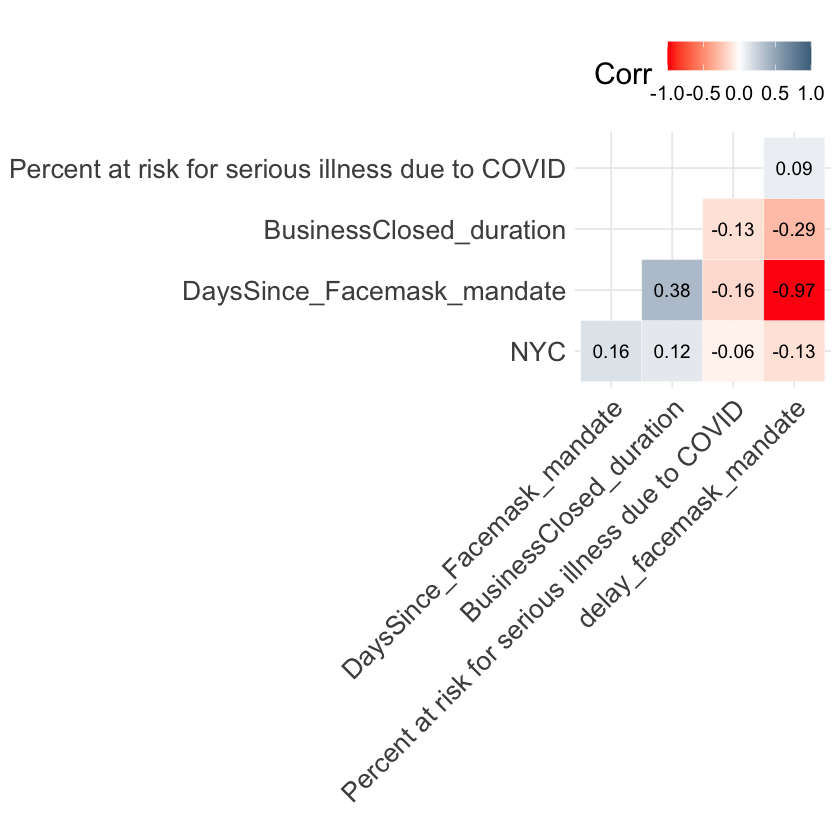

In [18]:

#correlation matrix table
corr_vars = c( "Percent at risk for serious illness due to COVID", "DaysSince_Facemask_mandate" , 
"BusinessClosed_duration" , "delay_facemask_mandate" ,"NYC")

corr_mat = round(cor(df[!is.na(df$DaysSince_Facemask_mandate) & !is.na(df$BusinessClosed_duration) & !is.na(df$delay_facemask_mandate), corr_vars], method = "pearson"),2)

#correlation matrix visual
(corr_matrix = ggcorrplot(corr_mat, hc.order = TRUE, type = "lower", outline.col = "white",  colors = c("red", "white", "skyblue4"), lab = TRUE, tl.cex = 16) + 
theme(legend.title = element_text(size = 18), legend.text = element_text(size = 12), legend.position = "top"))

From the correlation matrix, we see that Delay in applying face mask mandate is highly negatively correlated with Days since the policy has been applied. It makes sense as the later the policy applied, lesser will be the number of days its been in effect.Since we are able to see delay effect stronger on the cases, we will keep that for our regression study.

The other variables like business closed duration, % population at risk and NYC seem to show effect on the case number , hence we will use them in our improvements.

### 2.4 Regression Models

###### Base model 

We used case_norm which is log(Total cases/Population density per square mile) as the dependent variable and  delay_facemask_mandate which is number of days the face mask mandate was delayed to be applied as independent variables in our minimum model. 
Since we are interested in evaluating factors affecting total cases, specifically the effect of face mask policy , delay_facemask_mandate is ideal for base model. Durinf EDA, we also identified good enough correlation between the two which supports our choice.
Also, we have also included NYC as indicator variable as the effect in New York State will be different as compared to other states.
Based on the value of the estimated coefficients of our base model, we will select variables that will enter our model during the next round. 


In [19]:
#Base Model: regression without 2 main covariates

linearmodel1 <- lm(case_norm ~ delay_facemask_mandate + NYC  , data = df)
summary(linearmodel1)


Call:
lm(formula = case_norm ~ delay_facemask_mandate + NYC, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8524 -0.6621  0.2486  1.0519  1.9168 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.37046    0.87050   3.872 0.000412 ***
delay_facemask_mandate  0.03970    0.01596   2.487 0.017397 *  
NYC                     2.01700    1.49014   1.354 0.183871    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.46 on 38 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.161,	Adjusted R-squared:  0.1169 
F-statistic: 3.647 on 2 and 38 DF,  p-value: 0.03557


In [20]:
#multicollienarity check
vif(linearmodel1)

delay_facemask_mandate                    NYC 
              1.015617               1.015617

From the model output: 
1. We can for a day increase in the delay of face mask mandate will increase the  cases per number of persons per square mile by 100(beta_1) which is about 3.9%. This is good enough increasing effect.Also we see t statitic for delay as 2.312, hence it is statistically significant.
2. For the same delay duration, New York state has 200% more increase in cases as compared to other states. This is very strong increase effect. However from t vales as 1.354, it is not statistically significant enough.
3. The adjusted R quare value of 0.116 suggestes that delay in face mask mandate and NYC indicator explains 11.69% of the variation in cases. Hence we definitely should look at other key variables that explain the increase in cases better.
4. Since VIF of for each regressor is low (between 1 and 2), we can say that the factors are not co-related to impact our regression model.

###### Improvement 1 on base model 

Now lets see if the error term of base model can be explained by other covariates such as:

1. Number of days business were closed
2. NYC dummy variable


In [21]:
linearmodel2 <- lm(case_norm ~  delay_facemask_mandate + BusinessClosed_duration + NYC, data = df)
summary(linearmodel2 )



Call:
lm(formula = case_norm ~ delay_facemask_mandate + BusinessClosed_duration + 
    NYC, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4167 -1.0302  0.1529  1.2553  1.9228 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)              3.29915    1.72863   1.909   0.0666 .
delay_facemask_mandate   0.04578    0.01995   2.295   0.0294 *
BusinessClosed_duration -0.00888    0.02396  -0.371   0.7137  
NYC                      2.31849    1.64787   1.407   0.1704  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.603 on 28 degrees of freedom
  (19 observations deleted due to missingness)
Multiple R-squared:  0.2118,	Adjusted R-squared:  0.1274 
F-statistic: 2.509 on 3 and 28 DF,  p-value: 0.07924


In [22]:
#multicollienarity check
vif(linearmodel2)

delay_facemask_mandate BusinessClosed_duration                     NYC 
               1.103677                1.100757                1.024216

From the model output: 
1. For a day increase in the delay of face mask mandate increases the  cases per number of persons per square mile by 100(beta_1) which is about 4.5%. This is improvement in the increasing effect.Also we see t statitic for delay as 2.295, hence it is still statistically significant.
2. Also, for a day increase in the business close duration decreases the  cases per number of persons per square mile by 100(beta_2) which is about 0.88%. This is not a strong decreasing effect.Also we see t statitic for delay -0.371, hence it not statistically significant.
2. For the same delay duration and business closed duration, New York state has 230% more increase in cases as compared to other states. This is improvement on the increase effect. t value has also improved as 1.407, but it is still not statistically significant enough.
3. The adjusted R quare value of 0.1274 suggestes that delay in face mask mandate, business closed duration and NYC indicator explains 12.74% of the variation in cases. 
4. Since VIF of for each regressor is low (between 1 and 2), we can say that the factors are not co-related to impact our regression model.




###### Improvement 2 on base model 

Now lets include Percent at risk for serious illness due to COVID in our next improvement:


In [23]:
linearmodel3 <- lm(case_norm ~ delay_facemask_mandate+ BusinessClosed_duration + `Percent at risk for serious illness due to COVID` + NYC , data =df)
summary(linearmodel3 )


Call:
lm(formula = case_norm ~ delay_facemask_mandate + BusinessClosed_duration + 
    `Percent at risk for serious illness due to COVID` + NYC, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7507 -0.6486  0.2470  1.1301  1.8830 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                         5.64769    3.37200   1.675
delay_facemask_mandate                              0.04665    0.02010   2.321
BusinessClosed_duration                            -0.01099    0.02424  -0.453
`Percent at risk for serious illness due to COVID` -0.06000    0.07380  -0.813
NYC                                                 2.26204    1.65939   1.363
                                                   Pr(>|t|)  
(Intercept)                                          0.1055  
delay_facemask_mandate                               0.0281 *
BusinessClosed_duration                              0.6540  
`Percen

In [24]:
vif(linearmodel3)

delay_facemask_mandate 
                                          1.106814 
                           BusinessClosed_duration 
                                          1.113503 
`Percent at risk for serious illness due to COVID` 
                                          1.023107 
                                               NYC 
                                          1.026013

From the model output: 
1. For a day increase in the delay of face mask mandate increases the  cases per number of persons per square mile by 100(beta_1) which is about 4.6%. This is not a significant improvement in the increasing effect from linearamodel2.However t statitic for delay as 2.321, hence it is still statistically significant.
2. For a day increase in the business close duration decreases the  cases per number of persons per square mile by 100(beta_2) which is about 1.09%. This is not a strong decreasing effect, but imporvemnt from model 2.
3. For each percent increase in Percent at risk for serious illness due to COVID, there is 6% decrease in cases per number of persons per square mile. This effect is hard to interpret. However, t value is not significant for this factor.
2. For the same delay duration,business closed duration and population at risk, New York state has 226% more increase in cases as compared to other states. This is almost same as model 2. t value is 1.363 which is not statistically significant enough.
3. The adjusted R quare value of 0.1167 suggestes that delay in face mask mandate, business closed duration, % population at risk and NYC indicator explains 11.67% of the variation in cases.
4. Since VIF of for each regressor is low (between 1 and 2), we can say that the factors are not co-related to impact our regression model.


## 3.  Assessment of CLM assumptions:
#### Assumption MLR.1 (linear in parameters): 
1. Our model is represented as 𝑦=𝛽0+𝛽1*delay_facemask_mandate+𝛽2*NYC+𝑢. So by definition we have met this assumption






#### Assumption MLR.2 (random sampling): 
1. The sampling method ensured all samples are randomly drawn from the population, and data points are iid—independently and identically distributed.
2. No clustering happened in the sampling method, because we get total number of cases/death in each providence, instead of only examining a limited number of people
3. No autocorrelation happened. We have cross-sectional data points, represented in each province, instead of time series data. So there is no significant correlation among samples in each province

#### Assumption MLR.3 (no perfect collinearity): 
1. We choose delay_facemask_mandate, and NYC as our independent variables, and there is no exact relationships nor perfect collinearity among the independent variables


#### Assumption MLR.4 (zero-conditional mean): 
1. we examine this assumption by looking at Residual vs Fitted value plot.
2. Ideally we could get a flat red line representing zero conditional mean. 
3. Here we got some curvature on the far right in the red curve, but the magnitude of curvature is very small (<-0.2). This could be caused by the so few data points on the right side of the plot
4. This non-normality is also reflected in the significance on the Shapiro test 
5. We don't have zero conditional mean. But because we have a large sample size of 46 (>30), we can rely on asymptotics and assess exogeneity. If we set aside causality and just look for the best fit line, exogeneity tells us that our estimates are consistent.

Warning message:
“not plotting observations with leverage one:
  28”Warning message:
“not plotting observations with leverage one:
  28”

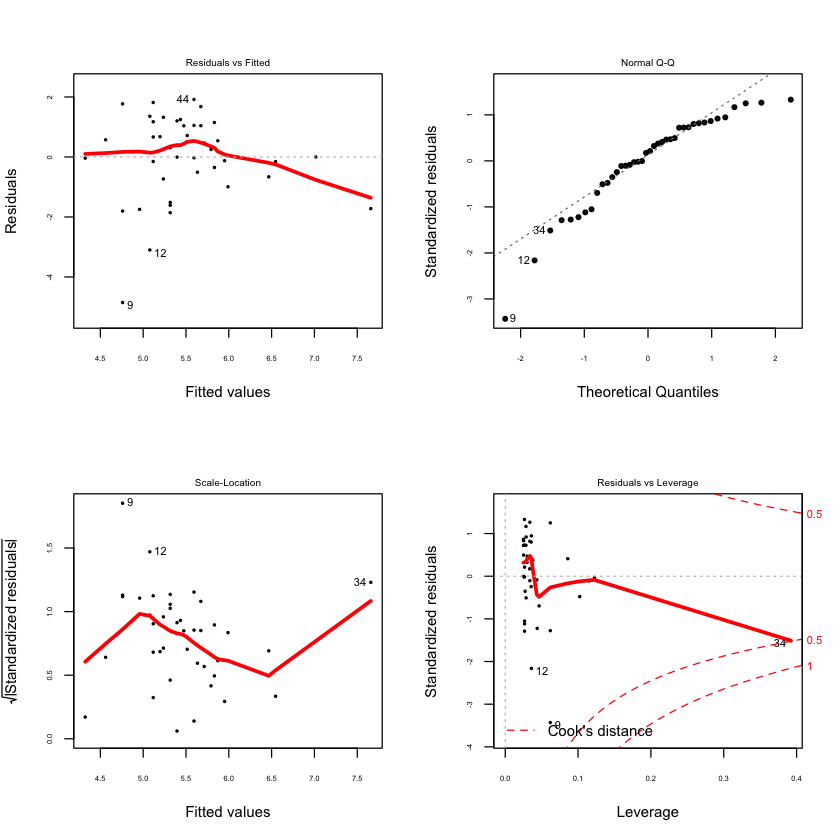

In [25]:
par(mfrow = c(2, 2), cex = .75)
plot(linearmodel1, cex.caption = .5, cex.axis = .5, cex.lab = 1, pch = 20, cex = .5, lwd = 3)


#plot(linearmodel1)

In [26]:
shapiro.test(linearmodel1$residual)


	Shapiro-Wilk normality test

data:  linearmodel1$residual
W = 0.91028, p-value = 0.003383


#### Assumption MLR.5 (Homoskedasticity): 
1. We see from the scale-location plot, the red line is trending upwards, implying heteroskedasticity in our sample
2. We will proceed with heteroskedastic robust errors

In [27]:
#bptest(linearmodel1)

In [28]:
coeftest(linearmodel1, vcov = vcovHC)


t test of coefficients:

                       Estimate Std. Error t value Pr(>|t|)
(Intercept)              3.3705         NA      NA       NA
delay_facemask_mandate   0.0397         NA      NA       NA
NYC                      2.0170         NA      NA       NA


#### Assumption MLR.6 (Normality of error terms):
1. From Q-Q plot, we could see standardized residual fits in a linear line in the middle of the plot, but there are some deviation on left and right side of the plot
2. Because we have a large sample size of 46 (>30), we could invoke Central Limit Theorem here which states OLS estimators are normally distributed for large sample sizes.


#### Influential Data Point:
1. From Residuals vs Leverage plot, we could see there are no data points with greater than 0.5 Cook's distance. So there is no data point with large influence to the model

## 4. Regression Table

In [31]:
(se.model1 = coeftest(linearmodel1, vcov = vcovHC)[ , "Std. Error"])
(se.model2 = coeftest(linearmodel2, vcov = vcovHC)[ , "Std. Error"])
(se.model3 = coeftest(linearmodel3, vcov = vcovHC)[ , "Std. Error"])

(Intercept) delay_facemask_mandate                    NYC 
                   NaN                    NaN                    NaN

(Intercept)  delay_facemask_mandate BusinessClosed_duration 
                    NaN                     NaN                     NaN 
                    NYC 
                    NaN

(Intercept) 
                                               NaN 
                            delay_facemask_mandate 
                                               NaN 
                           BusinessClosed_duration 
                                               NaN 
`Percent at risk for serious illness due to COVID` 
                                               NaN 
                                               NYC 
                                               NaN

In [30]:
stargazer(linearmodel1, linearmodel2, linearmodel3, type = "text", omit.stat = "f",
          se = list(se.model1, se.model2, se.model3),
          star.cutoffs = c(0.05, 0.01, 0.001))



                                                                 Dependent variable:              
                                                   -----------------------------------------------
                                                                      case_norm                   
                                                         (1)             (2)             (3)      
--------------------------------------------------------------------------------------------------
delay_facemask_mandate                                  0.040           0.046           0.047     
                                                                                                  
                                                                                                  
BusinessClosed_duration                                                -0.009          -0.011     
                                                                                                  
         

#### Statistical significance:
1. In our model (1), (2) and (3), none of the variables are statistical significant after using heteroskedastic robust errors. 

#### Practical significance:
We assess practical signifiance based on the magnitude of estimated beta. 
1. NYC has the most practical significance. In model (1), (2) and (3), NYC increase by 1 unit of standard deviation, number of cases will increase by 2.02, 2.3, and 2.26 unit of standard deviation, respectively.  
2. From model (2) and (3), we see that delay_facemask_mandate is positively correlated to number of cases, indicated that total cases increase with increase in the delay. This is consistent with our assumption.
3. Coefficients dont change much from model to model, so that implies model robustness



## 5. A Discussion of Omitted Variables


In this section we will identify the following variables as omitted variables and analysis their effect on the regression model:

1. Medical capability
2. Percentage transportation in public vehicle
3. State population flow rate
4. Time since first 50 covid case
5. State GDP per capita in 2019

Note our regression model can be represented as the following: 

>$y = \beta_0 + \beta_1\text{MandateFaceMask_fac} + \beta_2\text{pop18_norm} + \beta_3\text{delay_facemask_mandate} + \beta_4\text{BusinessClosed_duration} + \beta_5\text{Stay_at_Home_duration} + \mu$

where y is the number of cases normalized.
   
Coefficients:
                                   Estimate     
(Intercept)                      -0.0242743     
MandateFaceMask_fac               0.0517850      
pop18_norm                        0.6630841      
delay_facemask_mandate           -0.0005367      
BusinessClosed_duration           0.0032068      
Stay_at_Home_duration            -0.0021710      

We assume the omitted bias is introduced with the omitted variable included in $\mu$ such that:
>$y = (\beta_0+\beta_6\delta_0) + (\beta_1+\beta_6\delta_1)\text{MandateFaceMask_fac} + (\beta_2+\beta_6\delta_2)\text{pop18_norm} + (\beta_3+\beta_6\delta_3)\text{delay_facemask_mandate} + (\beta_4+\beta_6\delta_4)\text{BusinessClosed_duration} + (\beta_5+\beta_6\delta_5)\text{Stay_at_Home_duration} + \mu$

where $\beta_6$ is the coefficient of the omitted variable and $\delta_x$ is its relationship with other variables respectively.

The following discussion around individual omitted variables will be referring to the equation mentioned above.


#### Medical Capability

##### Summary
> If $\beta_6 < 0$ and $\delta_1 < 0$ then $OMVB = \beta_6\delta_1>0$ and if $\beta_1 < 0$ then the OLS coefficient on $\text{delay_facemask_mandate}$ will be scaled towards zero (less negative) losing statistical significance.


##### Reasoning
The medical capability (MC) should be negatively correlated with the number of covid cases. As the medical capabilities goes up, people are treated more quickly thus reducing the possible spread of the virus.

The medical capability would be negatively correalted with the delay_facemask_mandate. This is because if the medical supply is abundant, it would be quicker to provide citizens with face mask resources.

The medical capability is assumed to be independent with all other variables.

In this case, since MC is negatively correlated with y and negatively correlated with delay_facemask_mandate, 
$\beta_1+\beta_6\delta_1$ has the latter part as a positive number. This biases the overall result towards 0 as $\beta_1$ is found to be a negative number. Thus, omitting this variable reduces the effect of delay_facemask_mandate.


#### Percentage Transportation In Public Vehicle

##### Summary
> If $\beta_6 > 0$ and $\delta_4 < 0$ then $OMVB = \beta_6\delta_4<0$ and if $\beta_4 > 0$ then the OLS coefficient on $\text{BusinessClosed_duration}$ will be scaled towards zero (less positive) losing statistical significance.


##### Reasoning

The percentage transporation in public vehicle (PTPV) should be positively correlated with the number of covid cases. As the percentage of transportation done in the public vehicles increases, it is reasonable to assume that people will spread the virus quicker, thus increasing the number of cases.

The PTPV should be negatively correlated BusinessClosed_duration. The assumption is the greater the PIPV, the lower the average income of the state; the lower the average income, the quicker the businesses has to be reopen to boost the economy so people don't go bankrupt. 

The PIPV is assumed to be independent of all other variables.

In this case, since PIPV is positively correlated with y and negatively correlated with BusinessClosed_duration, $\beta_4+\beta_6\delta_4$ has the latter part as a negative number. Since $\beta_4$ is a positive number, this omitted variable will bias the result towards 0. Thus, omitting this variable reduces the effect of BusinessClosed_duration.

It is possible to estimate this variable using Percent living under the federal poverty line (2018) because these two variables both estimate the underlying variable: the economic well-being of the residents in the state.



#### State Population Flow Rate

##### Summary
> If $\beta_6 > 0$ and $\delta_5 < 0$ then $OMVB = \beta_6\delta_5<0$ and if $\beta_5 < 0$ then the OLS coefficient on $\text{Stay_at_Home_duration}$ will be scaled away from zero (more negative) gaining statistical significance.


##### Reasoning

The state population flow rate (SPFR) should be positively correlated with the number of covid cases. The greater the flow rate in and out the state, the higher the chances for covid to transmit, thus higher the number of cases.

The SPFR should be negative correlated with Stay_at_Home_duration. This is because the longer the stay at home duration, the less travel is going to be done in and out the state.

The SPFR is assumed to be independent of all other variables.

In this case, since SPFR is positively correlated with the # of covid cases and negatively correlated with the Stay_at_Home_duration, $\beta_5+\beta_6\delta_5$ has the latter part as a negative number. Since $\beta_5$ is estimated to be negative, this bias actually pushed the result away from 0. This could imply that Stay_at_Home_duration doesn't actually have an impact on the # of covid cases.


#### Time Since First 50 Covid Cases

##### Summary
> If $\beta_6 > 0$ and $\delta_3 < 0$ then $OMVB = \beta_6\delta_3<0$ and if $\beta_3 < 0$ then the OLS coefficient on $\text{delay_facemask_mandate}$ will be scaled away from zero (more negative) gaining statistical significance.


##### Reasoning

It is important to look at the time since the first 50 covid cases (TSF50Covid) because the greater the time, the more cases are accumulated. It is positively correlated with y.

The TSF50Covid would be negatively correlated with the delay_facemask_mandate. This is because the longer the time since the first 50 cases, the more likely the state is going to implement the mandate face mask policy earlier. 

The TSF50Covid is assumed to be independent of all other variables.

In this case, TSF50Covid is positively correlated with # of covid cases and negatively correlated with delay_facemask_mandate, $\beta_3+\beta_6\delta_3$ is going to have the latter as a negative number. Since $\beta_3$ is a negative number, this omitted variable is pushing the result away from 0.

It is possible to estimate this variable using the date of state emergency as it is reasonable to assume the state emergency is only issued when the covid situation is severe enough.


#### State GDP Per Capita In 2019

##### Summary
> If $\beta_6 < 0$ and $\delta_4 > 0$ then $OMVB = \beta_6\delta_4<0$ and if $\beta_4 > 0$ then the OLS coefficient on $\text{BusinessClosed_duration}$ will be scaled towards zero (less positive) losing statistical significance.


##### Reasoning

The state GDP per capita in 2019 (SGDP) should be negatively correlated with the number of covid cases. As the state GDP increases, it would be easier for people to stay at home for longer period of time without working, it is reasonable to assume that people will thus spread the virus slower, lowering the total number of cases.

The SGDP should be positively correlated BusinessClosed_duration. The assumption is the greater the SGDP, the more savings people have and thus the longer the businesses can remained closed without appling pressure to be reopened.

The SGDP is assumed to be independent of all other variables.

In this case, since SGDP is negatively correlated with y and positively correlated with BusinessClosed_duration, $\beta_4+\beta_6\delta_4$ has the latter part as a negative number. Since $\beta_4$ is a positive number, this omitted variable will bias the result towards 0. Thus, omitting this variable decreases the appeared effect of BusinessClosed_duration. In this sense, the business closed duration may actually have more of an impact than what we have measured it to be.

It is possible to estimate this variable using Percent living under the federal poverty line (2018) because these two variables both estimate the underlying variable: the economic well-being of the residents in the state.

## 6. A Conclusion




In the models that were built, we expected to find correlation between delay in applying face mask mandate and the covid-19 cases. The study supports our assumption with delay in face mask mandate showing robustness in coefficient for all three models. It suggests approx. 4% increase in cases per population density for every unit increase in the number of days of delay. However, the model does not show this factor to be strongly statistically significant with low p value and adjusted R square value.Furthermore, from the model we find New York state to have a stronger increase in the number of cases for every unit change in delay as compared to other states. However, this factor was not statistically significant, however coefficient was robust from model to model.

Therefore, relating back to the research question of whether mandating face masks in public facing business reduces the spread of COVID-19, we found that to be the case. Though our model did not show statistical significance, we still encourage other studies to be done on related topics. In hindsight, the dataset that was available was not adequately appropriate for the effect that we are trying to measure. The presence of omitted variables such as the timeline of the spread of the virus and peak point for each state inhibits the ability to accurately assess the realistic time independent impact of the virus.

However, the result shed light on how the mandate face mask policy was implemented. Given the correlation that was found in the model, it can be explained by how policies are created. The policy of mandating face mask usage is going to be implemented, and, earlier in time, if there is an imminent threat of the virus. The correlation that we found was an indication that the policy makers are unwilling to take certain measures for prevention until it is too late. This would be a great hypothesis for another study.
